<b>Target :</b> To build the basic skeletion ensuring
  1. Receptive field close to image size i.e 28
  2. Parameters < 8k
  3. Correct placement of max pooling to get edges+gradients and textures+patterns<br>

<b>Results :</b> The final model architecture is C->C->T(1x1->MP)->C->C->T(1x1->MP)->C->GAP->1x1 with number of channels = 16 across all layers. One thing note is that 1x1 can happen after MP in Transition block, so that 1x1 doen't have to deal with a bigger memory while multiplication<br>
  1. Best train accuracy : 98.55
  2. Best test accuracy : 98.57

<b>Analysis :</b> While there isn't such a huge gap between train and test accuracies, there is scope for learning. And since I cannot increase the parameters by a lot, I went for Batch Normalization next to make the model train harder.

# Import Libraries

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# The first line of code loads the autoreload extension
# The second line of code sets the autoreload mode to automatically reload all modules before each execution
# Without autoreload, you would need to restart the kernel and re-import the module to see the changes
# We no longer need to restart the kernel, but we have to re-import the module. Is this the expected behaviour?
%load_ext autoreload
%autoreload 2

In [3]:
!pip install torchsummary

In [4]:

from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

# Dataloader Arguments & Test/Train Dataloaders


In [5]:
SEED = 1

# CUDA?
use_cuda = torch.cuda.is_available()
print("CUDA Available?", use_cuda)

# For reproducibility
torch.manual_seed(SEED)

if use_cuda:
  torch.cuda.manual_seed(SEED)
  device = torch.device("cuda")
  batch_size = 128
  print("Running on the GPU")
else:
  device = torch.device("cpu")
  batch_size = 64
  print("Running on the CPU")


CUDA Available? True
Running on the GPU


In [6]:
from gdrive.MyDrive.utils_1 import *

train_loader, test_loader = getDataLoader(batch_size=batch_size)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:03<00:00, 3042597.34it/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 509101.85it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 3809331.80it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 10331089.35it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw




/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


# View sample images

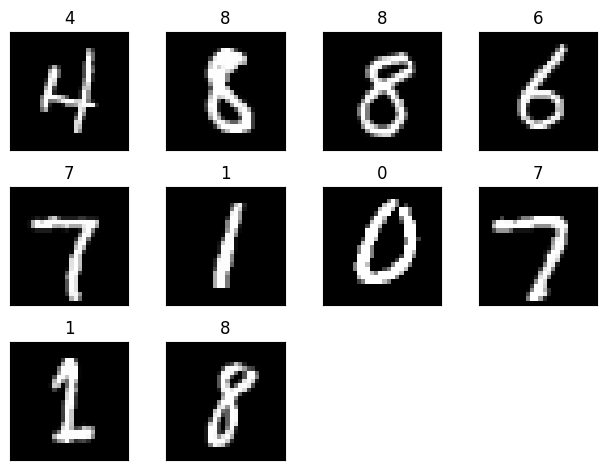

In [7]:
getSampleImages(train_loader, num_images = 10) # Need to fix this function as it can take a maximum of 12 images only

# Model Params

In [8]:
from gdrive.MyDrive.model_1 import Net # Instead of import * because Net is in a conflict with something else,

model = Net().to(device)
getModelSummary(model)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             144
              ReLU-2           [-1, 16, 26, 26]               0
            Conv2d-3           [-1, 16, 24, 24]           2,304
              ReLU-4           [-1, 16, 24, 24]               0
            Conv2d-5            [-1, 8, 24, 24]             128
         MaxPool2d-6            [-1, 8, 12, 12]               0
            Conv2d-7           [-1, 16, 10, 10]           1,152
              ReLU-8           [-1, 16, 10, 10]               0
            Conv2d-9             [-1, 16, 8, 8]           2,304
             ReLU-10             [-1, 16, 8, 8]               0
           Conv2d-11              [-1, 8, 8, 8]             128
        MaxPool2d-12              [-1, 8, 4, 4]               0
           Conv2d-13             [-1, 16, 4, 4]           1,152
             ReLU-14             [-1, 1

# Training and Testing

In [9]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = F.nll_loss
num_epochs = 15

train_losses, test_losses, train_acc, test_acc = training(model, device, num_epochs, train_loader, test_loader, optimizer, criterion, scheduler=None)

Epoch 1


Train: Loss=2.2959 Batch_id=468 Accuracy=11.05: 100%|██████████| 469/469 [00:15<00:00, 29.33it/s]


Test set: Average loss: 2.2944, Accuracy: 1780/10000 (17.80%)

Epoch 2


Train: Loss=0.2092 Batch_id=468 Accuracy=62.93: 100%|██████████| 469/469 [00:15<00:00, 29.47it/s]


Test set: Average loss: 0.2053, Accuracy: 9396/10000 (93.96%)

Epoch 3


Train: Loss=0.2794 Batch_id=468 Accuracy=94.35: 100%|██████████| 469/469 [00:16<00:00, 27.70it/s]


Test set: Average loss: 0.1198, Accuracy: 9615/10000 (96.15%)

Epoch 4


Train: Loss=0.1199 Batch_id=468 Accuracy=96.12: 100%|██████████| 469/469 [00:16<00:00, 29.06it/s]


Test set: Average loss: 0.1074, Accuracy: 9667/10000 (96.67%)

Epoch 5


Train: Loss=0.0400 Batch_id=468 Accuracy=96.93: 100%|██████████| 469/469 [00:16<00:00, 29.04it/s]


Test set: Average loss: 0.1046, Accuracy: 9671/10000 (96.71%)

Epoch 6


Train: Loss=0.1258 Batch_id=468 Accuracy=97.34: 100%|██████████| 469/469 [00:16<00:00, 28.74it/s]


Test set: Average loss: 0.0663, Accuracy: 9783/10000 (97.83%)

Epoch 7


Train: Loss=0.0825 Batch_id=468 Accuracy=97.63: 100%|██████████| 469/469 [00:18<00:00, 25.90it/s]


Test set: Average loss: 0.0694, Accuracy: 9767/10000 (97.67%)

Epoch 8


Train: Loss=0.0454 Batch_id=468 Accuracy=97.75: 100%|██████████| 469/469 [00:16<00:00, 27.96it/s]


Test set: Average loss: 0.0581, Accuracy: 9814/10000 (98.14%)

Epoch 9


Train: Loss=0.0169 Batch_id=468 Accuracy=98.04: 100%|██████████| 469/469 [00:16<00:00, 28.06it/s]


Test set: Average loss: 0.0555, Accuracy: 9823/10000 (98.23%)

Epoch 10


Train: Loss=0.0588 Batch_id=468 Accuracy=98.17: 100%|██████████| 469/469 [00:16<00:00, 28.09it/s]


Test set: Average loss: 0.0540, Accuracy: 9828/10000 (98.28%)

Epoch 11


Train: Loss=0.0601 Batch_id=468 Accuracy=98.11: 100%|██████████| 469/469 [00:17<00:00, 26.91it/s]


Test set: Average loss: 0.0489, Accuracy: 9837/10000 (98.37%)

Epoch 12


Train: Loss=0.0860 Batch_id=468 Accuracy=98.25: 100%|██████████| 469/469 [00:16<00:00, 28.38it/s]


Test set: Average loss: 0.0514, Accuracy: 9826/10000 (98.26%)

Epoch 13


Train: Loss=0.0147 Batch_id=468 Accuracy=98.41: 100%|██████████| 469/469 [00:16<00:00, 28.83it/s]


Test set: Average loss: 0.0485, Accuracy: 9844/10000 (98.44%)

Epoch 14


Train: Loss=0.0185 Batch_id=468 Accuracy=98.47: 100%|██████████| 469/469 [00:16<00:00, 28.78it/s]


Test set: Average loss: 0.0453, Accuracy: 9848/10000 (98.48%)

Epoch 15


Train: Loss=0.0147 Batch_id=468 Accuracy=98.55: 100%|██████████| 469/469 [00:18<00:00, 24.84it/s]


Test set: Average loss: 0.0439, Accuracy: 9857/10000 (98.57%)



# Graphs

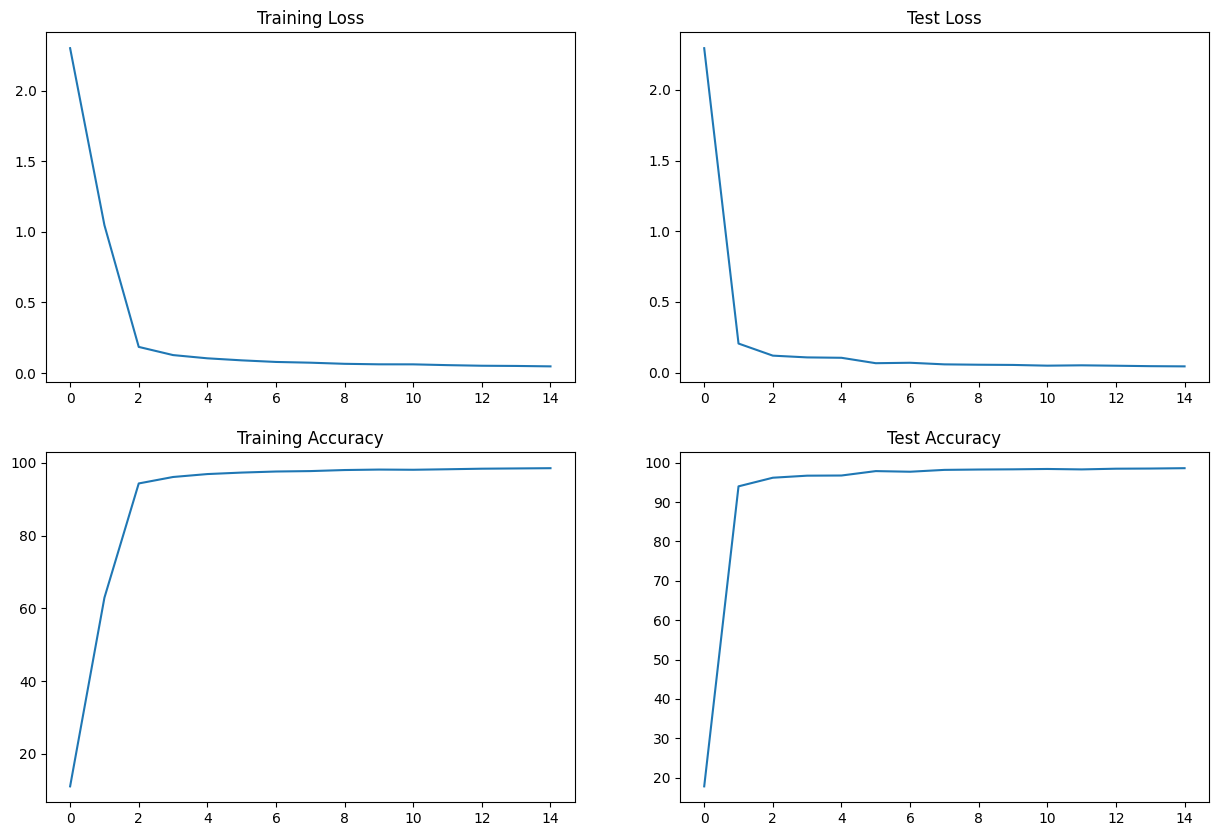

In [10]:
getTrainingTestPlots(train_losses, test_losses, train_acc, test_acc)